In [3]:
import pandas as pd
import sqlite3

In [4]:
df = pd.read_csv("results.csv")
df

,actor,movie_or_TV_name
0,Natalie Portman,Lady in the Lake
1,Natalie Portman,Foxy Trotter
2,Natalie Portman,May December
3,Natalie Portman,Bronco Belle
4,Natalie Portman,Secrets of the Elephants
...,...,...
2610,Sinéad Cusack,The Ballad of Tam Lin
2611,Sinéad Cusack,The Rise and Rise of Michael Rimmer
2612,Sinéad Cusack,Menace
2613,Sinéad Cusack,Hoffman


In [9]:
conn = sqlite3.connect("actor_movie_TV.db")
df.to_sql("actor_movie_table", conn, index = False, if_exists = 'replace')

2615

In [46]:
cmd = \
"""
SELECT 
    amt.movie_or_TV_name AS "Movie/TV Name",
    COUNT(amt.actor) AS "Number of Shared Actors"
FROM actor_movie_table amt
GROUP BY amt.movie_or_TV_name
HAVING COUNT(amt.actor) >=2
ORDER BY COUNT(amt.actor) DESC
"""
df2 = pd.read_sql(cmd, conn)
df2 = df2.iloc[1:,:].head(10)
df2

,Movie/TV Name,Number of Shared Actors
1,Midsomer Murders,9
2,Waking the Dead,8
3,The Bill,7
4,Peak Practice,7
5,Casualty,7
6,Agatha Christie's Poirot,7
7,Hustle,6
8,Heartbeat,6
9,Doctor Who,6
10,The Crystal Cube,5


<AxesSubplot:title={'center':"Movies of most shared actors with 'V for Vendetta'"}, xlabel='Movie/TV Name'>

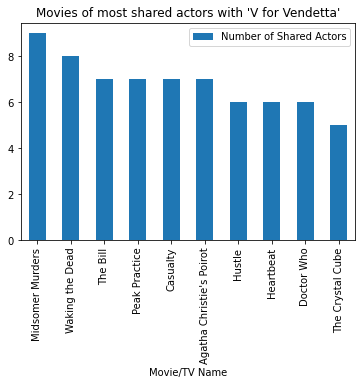

In [47]:
df2.plot.bar(x = "Movie/TV Name", 
             y = "Number of Shared Actors",
             title = "Movies of most shared actors with 'V for Vendetta'")